# **Statistical Analysis of Gender Differences in Average Purchase Amounts**

<h4 style="font-size:24px; line-height:1.5; padding:5px;">
<b>Import packages and load data</b>
</h4>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('walmart.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


<h4 style="font-size:24px; line-height:1.5; padding:5px;">
<b>Visualizing Gender Differences in Average Purchase Amounts</b>
</h4>

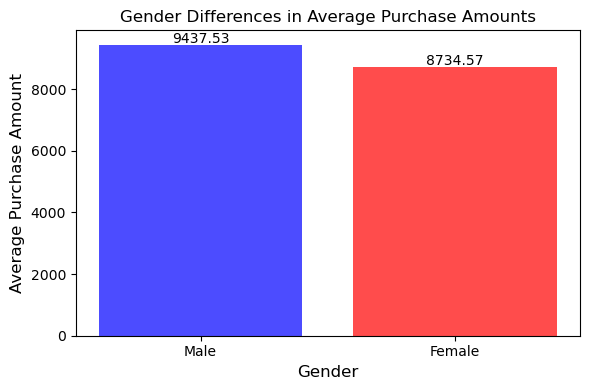

In [6]:
mean_male = male_purchases.mean()
mean_female = female_purchases.mean()

# Define categories and means
categories = ['Male', 'Female']
means = [mean_male, mean_female]

# Create the bar chart
plt.figure(figsize=(6, 4))
plt.bar(categories, means, color=['blue', 'red'], alpha=0.7)
plt.title('Gender Differences in Average Purchase Amounts', fontsize=12)
plt.ylabel('Average Purchase Amount', fontsize=12)
plt.xlabel('Gender', fontsize=12)

# Add numeric labels on bars
for i, mean in enumerate(means):
    plt.text(i, mean + 45, f'{mean:.2f}', ha='center', fontsize=10)  
# Show the plot
plt.tight_layout()
plt.show()

<h4 style="font-size:24px; line-height:1.5; padding:5px;">
<b>Use Histograms with KDE to check the distribution of purchases between males and females</b>
</h4>

C:\Users\hankc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hankc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


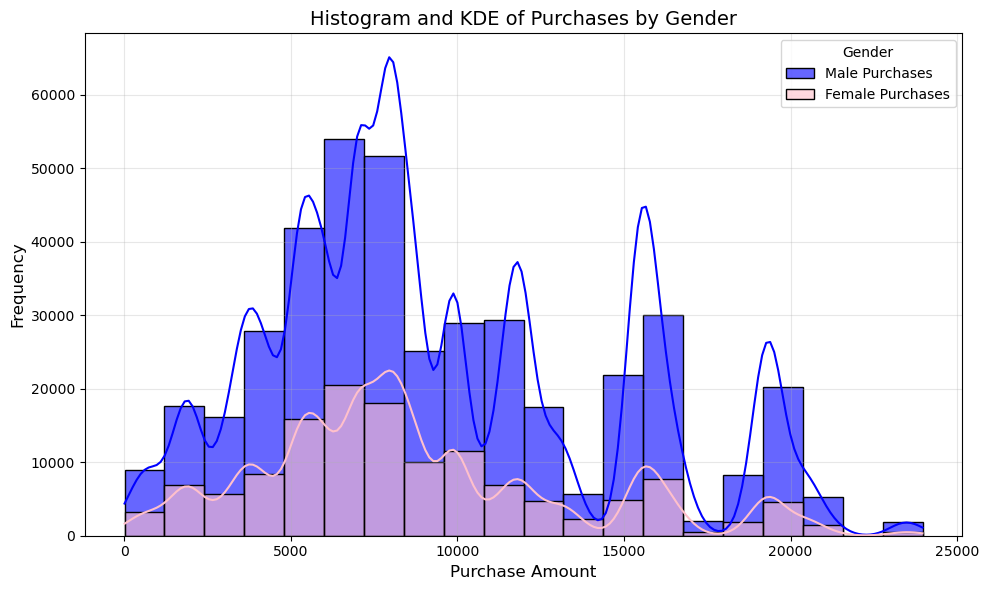

In [2]:
# Filter data
male_purchases = df[df["Gender"] == "M"]["Purchase"]
female_purchases = df[df["Gender"] == "F"]["Purchase"]

# Plot histograms with KDE
plt.figure(figsize=(10, 6))
sns.histplot(male_purchases, label="Male Purchases", color="blue", bins=20, alpha=0.6, kde=True)
sns.histplot(female_purchases, label="Female Purchases", color="pink", bins=20, alpha=0.6, kde=True)

# Add labels, legend, and title
plt.xlabel("Purchase Amount", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Histogram and KDE of Purchases by Gender", fontsize=14)
plt.legend(title="Gender")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

<h4 style="font-size:24px; line-height:1.5; padding:5px;">
<b>Conduct a Normality Test using the Shapiro-Wilk test</b>
</h4>

In [3]:
from scipy.stats import shapiro

# Shapiro-Wilk Test for male purchases
stat_m, p_m = shapiro(male_purchases)
print("Male Purchases: Test Statistic =", stat_m, ", p-value =", p_m)

# Shapiro-Wilk Test for female purchases
stat_f, p_f = shapiro(female_purchases)
print("Female Purchases: Test Statistic =", stat_f, ", p-value =", p_f)

# Interpretation
alpha = 0.05  # Significance level
if p_m > alpha:
    print("Male Purchases: Data appears to be normally distributed (fail to reject H0).")
else:
    print("Male Purchases: Data does not follow a normal distribution (reject H0).")

if p_f > alpha:
    print("Female Purchases: Data appears to be normally distributed (fail to reject H0).")
else:
    print("Female Purchases: Data does not follow a normal distribution (reject H0).")

Male Purchases: Test Statistic = 0.9556296678577751 , p-value = 1.2492266952467864e-116
Female Purchases: Test Statistic = 0.9463692780814479 , p-value = 6.632544579878843e-102
Male Purchases: Data does not follow a normal distribution (reject H0).
Female Purchases: Data does not follow a normal distribution (reject H0).


C:\Users\hankc\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 414259.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\hankc\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 135809.
  res = hypotest_fun_out(*samples, **kwds)


<h4 style="font-size:24px; line-height:1.5; padding:5px;">
<b>Since the data does not follow a normal distribution, we use a Nonparametric test (Mann-Whitney U test) to assess whether there is a statistically significant difference in the average purchase amounts between genders</b>
</h4>

In [5]:
from scipy.stats import mannwhitneyu

# Mann-Whitney U Test
stat, p_value = mannwhitneyu(male_purchases, female_purchases)
print(f"U-Statistic: {stat}, p-value: {p_value:}")

# Interpretation of the result
alpha = 0.05
if p_value > alpha:
    print("No significant difference (fail to reject H0).")
else:
    print("Significant difference (reject H0).")

U-Statistic: 30179738109.5, p-value: 0.0
Significant difference (reject H0).
